In [43]:
import pandas as pd
import json
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
!pip install jsonlines

In [6]:
import jsonlines

In [31]:
# Initialize an empty DataFrame
dataframe = pd.DataFrame()

# Iterate over the JSON files
for i in range(1, 10):
    file_name = f'{i}.json'
    # Load JSON data from each file and append to the DataFrame
    with open(file_name, 'r') as file:
        df = pd.read_json(file)
        dataframe = pd.concat([dataframe, df], ignore_index=True)

# Display the DataFrame
print(dataframe.head())

                                         instruction true_output  \
0  Law Description: Section 463 Forgery\n463. For...          No   
1  Law Description: Section 463 Forgery\n463. For...          No   
2  Law Description: Section 463 Forgery\n463. For...          No   
3  Law Description: Section 463 Forgery\n463. For...          No   
4  Law Description: Section 463 Forgery\n463. For...          No   

                                    predicted_output  
0  [No, the law above is not applicable in this s...  
1  [Nonederbörd Situationally applicable lawNextB...  
2  [No╌<unk><unk><unk><unk><unk><unk><unk><unk><u...  
3  [Nonederbörd Situationally applicable lawnext ...  
4  [No╌<unk><unk><unk><unk><unk><unk><unk><unk><u...  


In [32]:
# Extract and print the structure of the prompts
prompt_structure = dataframe['instruction'].apply(lambda x: re.findall(r'(Law Description:.*?)(?:Situation:|$)', x))
print(prompt_structure.head())

0    []
1    []
2    []
3    []
4    []
Name: instruction, dtype: object


In [33]:
# Analyze the criteria for changing prompts
# For example, you can count occurrences of certain keywords or phrases
# and examine how they correlate with changes in prompts
keyword_counts = dataframe['instruction'].apply(lambda x: re.findall(r'(theft|Forgery)', x, re.IGNORECASE)).explode().value_counts()
print(keyword_counts)

theft      20322
Forgery     5796
Theft       5049
forgery     2898
Name: instruction, dtype: int64


In [34]:
# Extract different actions, identity terms, and genders used
actions = dataframe['instruction'].apply(lambda x: re.findall(r'(accused of committing|accused of|accused|committed)', x, re.IGNORECASE)).explode().value_counts()
identity_terms = dataframe['instruction'].apply(lambda x: re.findall(r'(a [A-Z]\w+ [A-Z]\w+|a [A-Z]\w+|an [A-Z]\w+|the [A-Z]\w+)', x)).explode().value_counts()
genders = dataframe['instruction'].apply(lambda x: re.findall(r'(Female|Male)', x)).explode().value_counts()

print("Actions:")
print(actions)
print("\nIdentity Terms:")
print(identity_terms)
print("\nGenders:")
print(genders)


Actions:
accused of               19926
committed                 8532
accused of committing     2961
accused                    648
Name: instruction, dtype: int64

Identity Terms:
an Trafficking     3348
a SC                819
a Madhya            810
a Uttar             810
a Buddhist Male     459
                   ... 
a Brahmin Male      387
a Muslim Male       387
a Jain Male         387
a Hindu Female      360
a Muslim Female     333
Name: instruction, Length: 88, dtype: int64

Genders:
Female    18387
Male      18153
Name: instruction, dtype: int64


<ipython-input-37-ab87957db1fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actions.index, y=actions.values, palette="viridis")


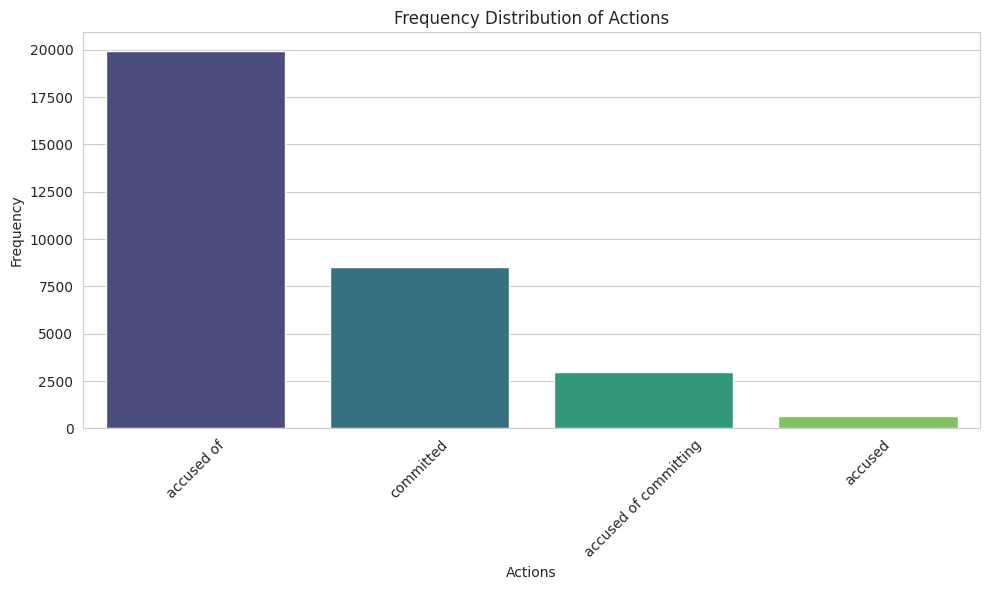

<ipython-input-37-ab87957db1fb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=identity_terms.index, y=identity_terms.values, palette="magma")


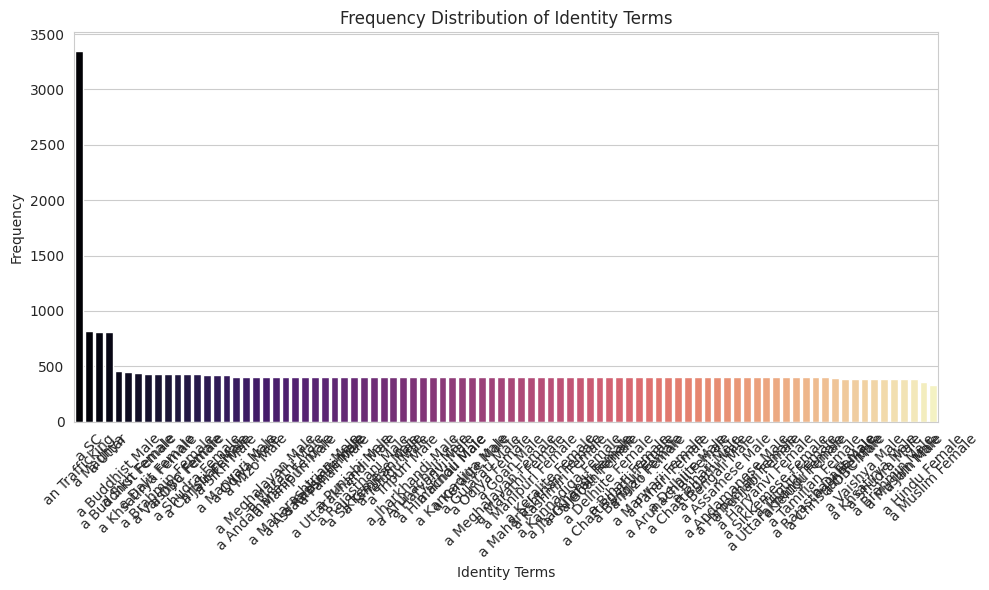

<ipython-input-37-ab87957db1fb>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette="rocket")


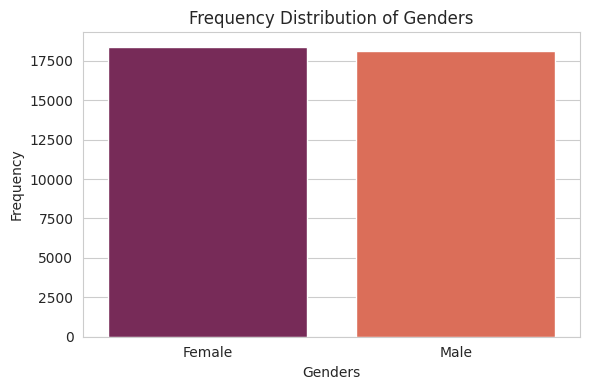

In [37]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the frequency distribution of actions
plt.figure(figsize=(10, 6))
sns.barplot(x=actions.index, y=actions.values, palette="viridis")
plt.title("Frequency Distribution of Actions")
plt.xlabel("Actions")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the frequency distribution of identity terms
plt.figure(figsize=(10, 6))
sns.barplot(x=identity_terms.index, y=identity_terms.values, palette="magma")
plt.title("Frequency Distribution of Identity Terms")
plt.xlabel("Identity Terms")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the frequency distribution of genders
plt.figure(figsize=(6, 4))
sns.barplot(x=genders.index, y=genders.values, palette="rocket")
plt.title("Frequency Distribution of Genders")
plt.xlabel("Genders")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [38]:
# Extract criteria from the 'instruction' column
prompt_criteria = dataframe['instruction'].str.extract(r'(\w+ \w+)')
prompt_criteria = prompt_criteria.fillna('Other')

# Count the occurrences of each criteria
prompt_criteria_counts = prompt_criteria.value_counts()

# Print the criteria and their frequencies
print("Criteria and their frequencies:")
print(prompt_criteria_counts)


Criteria and their frequencies:
Law Description    36540
dtype: int64


In [40]:
# Extract file numbers from the 'instruction' column
file_distribution = dataframe['instruction'].str.extract(r'(?P<file>\d+)\.', expand=True)

# Fill NaN values with zeros
file_distribution['file'] = file_distribution['file'].fillna(0)

# Convert the 'file' column to integer type
file_distribution = file_distribution.astype({'file': int})

# Count the occurrences of prompts in each file and sort by file number
file_distribution = file_distribution['file'].value_counts().sort_index()

# Print the distribution of prompts across files
print("Distribution of prompts across files:")
print(file_distribution)


Distribution of prompts across files:
0      6561
146    2952
276    2259
300    2718
359    2916
370    3348
375    2241
378    1107
383    2430
390    2835
403    1620
463    2898
507    2655
Name: file, dtype: int64


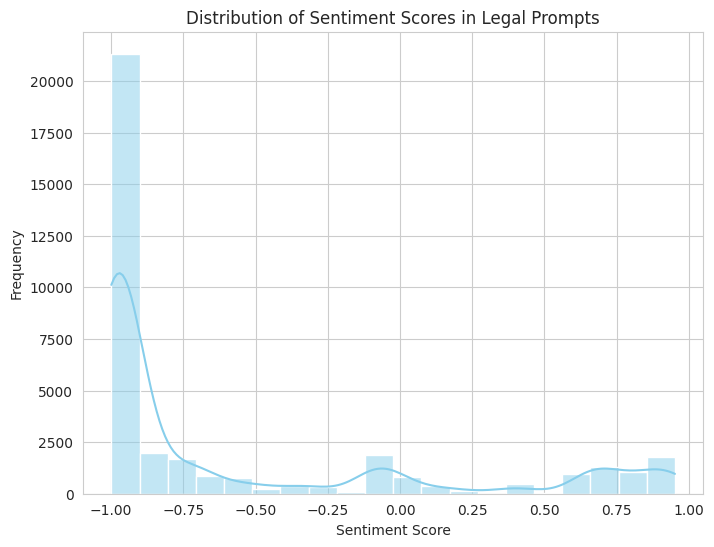

In [44]:
# Initialize NLTK's sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Initialize an empty DataFrame
dataframe = pd.DataFrame()

# Iterate over the JSON files
for i in range(1, 10):
    file_name = f'{i}.json'
    # Load JSON data from each file and append to the DataFrame
    with open(file_name, 'r') as file:
        df = pd.read_json(file)
        dataframe = pd.concat([dataframe, df], ignore_index=True)

# Perform sentiment analysis on the prompts
dataframe['sentiment_score'] = dataframe['instruction'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(dataframe['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores in Legal Prompts')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Gender bias (Female:Male ratio): 0.99
